In [294]:
#import libraries and setup sql cursor
import sqlite3
import pandas as pd
from bs4 import BeautifulSoup
import requests 
import matplotlib.pyplot as plt
import seaborn as sb

conn = sqlite3.connect('data/movies.db')
cur = conn.cursor()

## Get bom and rotten tomatoe data and merge them into one with overlapping values(inner)

In [295]:
#get rotten tomatoe data
rt_movies = pd.DataFrame(cur.execute("SELECT * FROM rotten_tomatoes_movies").fetchall())
rt_movies.columns = [i[0] for i in cur.description]

In [296]:
#get bom movie data
bom_movie_gross = pd.DataFrame(cur.execute("SELECT foreign_gross, domestic_gross, title from bom_movie_gross").fetchall())
bom_movie_gross.columns = [i[0] for i in cur.description]
bom_movie_gross = bom_movie_gross[bom_movie_gross["foreign_gross"].notna()]

In [297]:
#create merged dataframe of rotten tomatoe and bom movies
bom_gross_rt_genre = rt_movies.join(bom_movie_gross, how="inner")

In [298]:
#drop na values from rotten tomatoe and bom movie merge
bom_gross_rt_genre.dropna(inplace=True)

In [299]:
not_list_format =  bom_gross_rt_genre

In [300]:
#sc
not_list_format.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,foreign_gross,domestic_gross,title
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,149.0,Spilled,53.0,254421.0,43,73,76,652000000,415000000.0,Toy Story 3
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,142.0,Upright,64.0,11574.0,44,123,19,691300000,334200000.0,Alice in Wonderland (2010)
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,24.0,Spilled,53.0,14684.0,2,16,8,664300000,296000000.0,Harry Potter and the Deathly Hallows Part 1
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,54.0,Upright,97.0,105386.0,6,54,0,535700000,292600000.0,Inception
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,27.0,Upright,74.0,68918.0,5,24,3,513900000,238700000.0,Shrek Forever After


## get list of unique genres

In [301]:
#reformat genres data go make it a list of items
def get_unique_genres(raw_genres):
    all_genres = []
    genres = raw_genres.str.replace("&", ",")
    genres = raw_genres.str.split(',')
    for item in genres:
        if item != None:
            for genre in item:
                all_genres.append(genre)
    unique_genres = set(all_genres)
    unique_genres = set([(genre.strip()) for genre in unique_genres])
    return unique_genres
get_unique_genres(bom_gross_rt_genre["genres"])

{'Action & Adventure',
 'Animation',
 'Art House & International',
 'Classics',
 'Comedy',
 'Cult Movies',
 'Documentary',
 'Drama',
 'Faith & Spirituality',
 'Horror',
 'Kids & Family',
 'Musical & Performing Arts',
 'Mystery & Suspense',
 'Romance',
 'Science Fiction & Fantasy',
 'Special Interest',
 'Sports & Fitness',
 'Television',
 'Western'}

In [302]:
def get_unique_content_ratings(raw_content_ratings):
    all_content_ratings = []
    for rating in raw_content_ratings:
        all_content_ratings.append(rating)
    unique_content_ratings = set(all_content_ratings)
    return unique_content_ratings
unique_content_ratings = get_unique_content_ratings(action["content_rating"])

In [533]:
def get_unique_directors(raw_directors):
    all_directors = []
    clumped_directors = []
    clumped_directors = raw_directors.str.split(",")
    for row in clumped_directors:
        if row != None:
            for director in row:
                all_directors.append(director)
    unique_directors = set(all_directors)
    print(unique_directors)
    unique_directors = [(director.strip()) for director in unique_directors]
    return unique_directors
unique_directors = get_unique_directors(action["directors"])

{'Stanley Kubrick', ' Robert Parrish', 'Noam Murro', ' Chris Bertolini', 'Zack Snyder', 'John Wayne', 'Carl Erik Rinsch', 'Steve Miner', 'Wayne Kramer', 'Francis Ford Coppola', 'Richard Fleischer', 'Kurt Wimmer', 'Warren Beatty', 'Ralph Bakshi', 'Mike Hodges', ' Paul Dini', ' Danny Pang', 'Nikolai Muellerschoen', 'Joseph Kosinski', 'Peter Howitt', 'Karyn Kusama', ' Dave Willis', ' William Keighley', 'Wolfgang Reitherman', 'Matt Maiellaro', 'Sergey Bodrov', 'Steven Spielberg', 'Steven E. de Souza', 'John McTiernan', 'Ronald Neame', 'Oxide Chun Pang', 'Larry Bishop', 'Michael Bay', 'Phil Lord', 'James Fargo', ' Adam McKay', 'Kenneth Branagh', 'Franklin J. Schaffner', 'Panna Rittikrai', 'Don Bluth', 'Leslie H. Martinson', 'Kaige Chen', 'Roger Donaldson', 'George Roy Hill', 'Roger Vadim', 'Chris Columbus', 'Randall Wallace', 'Dennis Hopper', 'Roger Corman', 'Craig Mazin', 'Don Taylor', 'Ron Howard', 'Ridley Scott', 'Katsuhiro Ôtomo', 'Tony Scott', ' Tony Jaa', 'Robert Rodriguez', 'Harald Z

# Get data based off a certain genre from bom and rotten tomatoe merge

In [305]:
#function makes new databse with just a certain column
def get_genre_db(db, genre):
    return db[db["genres"].str.contains(genre)]

In [230]:
action = get_genre_db(bom_gross_rt_genre, "Action")

### gross by audience rating

In [395]:
action.sort_values("audience_rating", ascending=False, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating(/100)'),
 Text(0.5, 0, 'Domestic Gross(*100mil)'),
 Text(0.5, 1.0, 'Audience rating compared to Domestic Gross')]

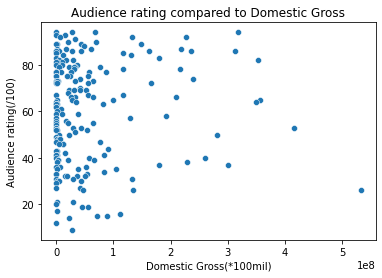

In [396]:
gross_rating = sb.scatterplot(action["domestic_gross"], action["audience_rating"])
gross_rating.set(ylabel ="Audience rating(/100)", xlabel = "Domestic Gross(*100mil)", title ='Audience rating compared to Domestic Gross')

In [423]:
#sc
action[action["directors"].str.contains("Tim Kirkby")]

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,foreign_gross,domestic_gross,title,dgross_and_rating
2323,2323,m/action_point,Action Point,D.C. is the crackpot owner of Action Point -- ...,Ouch.,R,"Action & Adventure, Comedy",Tim Kirkby,"Johnny Knoxville, John Altschuler, Dave Krinsky","Johnny Knoxville, Aidan Whytock, Joe Vaz, Leon...",...,Spilled,26.0,667.0,16,7,41,523900000.0,532200000.0,Rogue One: A Star Wars Story,2.046923e+07


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating(/100)'),
 Text(0.5, 0, 'Domestic Gross(*100mil)'),
 Text(0.5, 1.0, 'some title')]

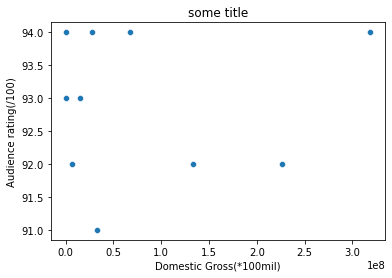

In [398]:
top_gross_rating = sb.scatterplot(action["domestic_gross"][0:10], action["audience_rating"][0:10])
top_gross_rating.set(ylabel ="Audience rating(/100)", xlabel = "Domestic Gross(*100mil)", title ='some title')

### content rating by audience rating

In [269]:
cr_ar = action.groupby(['content_rating'])['audience_rating'].mean().sort_values(ascending=False)

In [270]:
cr_ar

content_rating
NR       85.800000
G        71.909091
PG       61.617647
R        61.443182
PG-13    49.879310
Name: audience_rating, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Audience rating of 100'),
 Text(0.5, 0, 'Content Rating'),
 Text(0.5, 1.0, 'Audience rating based on content rating')]

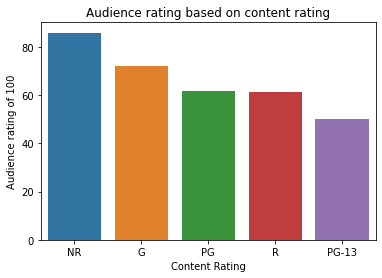

In [274]:
cr_ar_sb = sb.barplot(list(cr_ar.keys()), cr_ar)
cr_ar_sb.set(ylabel ="Audience rating of 100", xlabel = "Content Rating", title ='Audience rating based on content rating')

### top audience rating means by director

In [ ]:
action.groupby(['directors'])['audience_rating'].mean().sort_values(ascending=False)

In [516]:
#sc
len(action)

201

In [451]:
def groupby_unformatted_column(df, unique, unique_category, aggregate_category):
    #unique is a list of unique values of the unique category
    return_list = []
    occurances_list = []
    label_list = []
    return_dict = {}
    for item in unique:
        frame = df[df[unique_category].str.contains(item)]
        aggregate = round(frame[aggregate_category].mean(), 1)
        occurance = len(frame[aggregate_category])
        occurances_list.append(occurance)
        return_list.append(aggregate)
    return_dict = {unique_category: list(unique), aggregate_category: return_list, "occurances": occurances_list}
    df = pd.DataFrame(return_dict)
    df["labels"] = df[unique_category].astype(str) + " (" + df["occurances"].astype(str) + ")"
    df.sort_values(aggregate_category, inplace=True, ascending = False)
    return df


In [452]:
rating_director_df = groupby_unformatted_column(action, unique_directors, "directors", "audience_rating")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [528]:
unique_directors[35]

'Phil Lord'

In [522]:
rating_director_df.drop_duplicates(subset="directors", inplace=True)

In [524]:
rating_director_df

,directors,audience_rating,occurances,labels
116,Christopher Nolan,94.0,1,Christopher Nolan (1)
162,James Cameron,94.0,1,James Cameron (1)
11,Francis Ford Coppola,94.0,1,Francis Ford Coppola (1)
100,Andrei Tarkovsky,93.0,1,Andrei Tarkovsky (1)
119,Akira Kurosawa,93.0,1,Akira Kurosawa (1)
...,...,...,...,...
70,Steven C. Miller,17.0,1,Steven C. Miller (1)
99,Jeremiah S. Chechik,15.0,1,Jeremiah S. Chechik (1)
64,David Hogan,14.0,1,David Hogan (1)
66,York Alec Shackleton,9.0,1,York Alec Shackleton (1)


In [523]:
#sc
top_directors_by_rating

,directors,audience_rating,occurances,labels
59,Michael Curtiz,90.5,2,Michael Curtiz (2)
74,Robert Zemeckis,86.0,2,Robert Zemeckis (2)
136,Peyton Reed,80.5,2,Peyton Reed (2)
164,Christopher Miller,79.5,2,Christopher Miller (2)
65,Phil Lord,79.5,2,Phil Lord (2)
35,Phil Lord,79.5,2,Phil Lord (2)
82,Christopher Miller,79.5,2,Christopher Miller (2)
114,John Carpenter,78.5,2,John Carpenter (2)
14,Mike Hodges,77.0,2,Mike Hodges (2)
93,Terrence Malick,76.0,3,Terrence Malick (3)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Christopher Nolan (1)'),
 Text(0, 1, 'James Cameron (1)'),
 Text(0, 2, 'Francis Ford Coppola (1)'),
 Text(0, 3, 'Andrei Tarkovsky (1)'),
 Text(0, 4, 'Akira Kurosawa (1)'),
 Text(0, 5, 'George Roy Hill (1)'),
 Text(0, 6, 'Robert Rodriguez (1)'),
 Text(0, 7, 'Werner Herzog (1)'),
 Text(0, 8, 'Michael Curtiz (2)'),
 Text(0, 9, 'Katsuhiro Ôtomo (1)')]

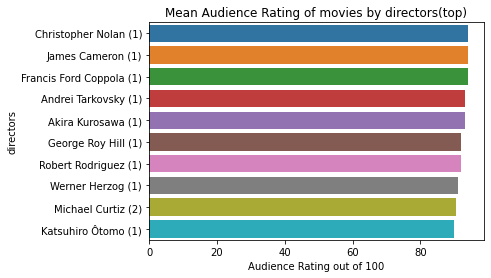

In [454]:
tdbar = sb.barplot(top_directors_by_rating["audience_rating"], top_directors_by_rating["directors"], orient = 'h')
tdbar.set(xlabel="Audience Rating out of 100", title="Mean Audience Rating of movies by directors(top)")
tdbar.set_yticklabels(top_directors_by_rating["labels"])

### Top Grossing means by director

#### top directors by mean Foreign Gross

In [467]:
fgross_by_director = groupby_unformatted_column(action, unique_directors, "directors", "foreign_gross")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [470]:
fgross_director_df[0:10]

,director,foreign_gross
43,Chris Columbus,652000000.0
187,Tim Kirkby,523900000.0
8,Richard Fleischer,513900000.0
176,William Friedkin,445000000.0
74,Robert Zemeckis,433250000.0
36,Franklin J. Schaffner,416300000.0
52,Ridley Scott,371700000.0
178,Adam Bhala Lough,368600000.0
111,John Herzfeld,339100000.0
0,Stanley Kubrick,330600000.0


In [469]:
#sc
top_directors_by_fgross

,director,foreign_gross
43,Chris Columbus,652000000.0
187,Tim Kirkby,523900000.0
8,Richard Fleischer,513900000.0
176,William Friedkin,445000000.0
74,Robert Zemeckis,433250000.0
36,Franklin J. Schaffner,416300000.0
52,Ridley Scott,371700000.0
178,Adam Bhala Lough,368600000.0
111,John Herzfeld,339100000.0
0,Stanley Kubrick,330600000.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


KeyError: 'labels'

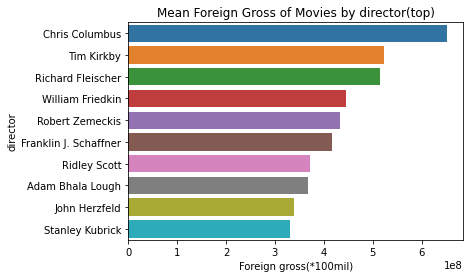

In [511]:
tdbfg = sb.barplot(top_directors_by_fgross["foreign_gross"], top_directors_by_fgross["director"], orient = 'h')
tdbfg.set(xlabel = "Foreign gross(*100mil)", title="Mean Foreign Gross of Movies by director(top)")
tdbfg.set_yticklabels(top_directors_by_fgross["labels"])

['Stanley Kubrick',
 'Robert Parrish',
 'Noam Murro',
 'Chris Bertolini',
 'Zack Snyder',
 'John Wayne',
 'Carl Erik Rinsch',
 'Steve Miner',
 'Richard Fleischer',
 'Wayne Kramer',
 'Kurt Wimmer',
 'Francis Ford Coppola',
 'Warren Beatty',
 'Ralph Bakshi',
 'Mike Hodges',
 'Paul Dini',
 'Danny Pang',
 'Nikolai Muellerschoen',
 'Joseph Kosinski',
 'Peter Howitt',
 'Karyn Kusama',
 'Dave Willis',
 'William Keighley',
 'Wolfgang Reitherman',
 'Matt Maiellaro',
 'Sergey Bodrov',
 'Steven Spielberg',
 'Steven E. de Souza',
 'John McTiernan',
 'Oxide Chun Pang',
 'Ronald Neame',
 'Larry Bishop',
 'Michael Bay',
 'Adam McKay',
 'James Fargo',
 'Phil Lord',
 'Franklin J. Schaffner',
 'Kenneth Branagh',
 'Panna Rittikrai',
 'Kaige Chen',
 'Don Bluth',
 'Leslie H. Martinson',
 'Roger Donaldson',
 'Chris Columbus',
 'George Roy Hill',
 'Roger Vadim',
 'Randall Wallace',
 'Dennis Hopper',
 'Roger Corman',
 'Craig Mazin',
 'Don Taylor',
 'Ron Howard',
 'Ridley Scott',
 'Katsuhiro Ôtomo',
 'Tony Sco

In [471]:
dgross_director_df = groupby_unformatted_column(action, unique_directors, "directors", "domestic_gross")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [472]:
top_directors_by_dgross = dgross_director_df[0:10]

In [476]:
#sc
top_directors_by_dgross

,directors,domestic_gross,occurances,labels
187,Tim Kirkby,532200000.0,1,Tim Kirkby (1)
43,Chris Columbus,415000000.0,1,Chris Columbus (1)
141,Wes Craven,350100000.0,1,Wes Craven (1)
75,Alfred Hitchcock,312400000.0,1,Alfred Hitchcock (1)
52,Ridley Scott,281700000.0,1,Ridley Scott (1)
74,Robert Zemeckis,267550000.0,2,Robert Zemeckis (2)
8,Richard Fleischer,238700000.0,1,Richard Fleischer (1)
73,Woo-ping Yuen,234900000.0,1,Woo-ping Yuen (1)
117,Bryan Spicer,228800000.0,1,Bryan Spicer (1)
0,Stanley Kubrick,218800000.0,1,Stanley Kubrick (1)


#### top directors by mean Gross domestic 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Tim Kirkby (1)'),
 Text(0, 1, 'Chris Columbus (1)'),
 Text(0, 2, 'Wes Craven (1)'),
 Text(0, 3, 'Alfred Hitchcock (1)'),
 Text(0, 4, 'Ridley Scott (1)'),
 Text(0, 5, 'Robert Zemeckis (2)'),
 Text(0, 6, 'Richard Fleischer (1)'),
 Text(0, 7, 'Woo-ping Yuen (1)'),
 Text(0, 8, 'Bryan Spicer (1)'),
 Text(0, 9, 'Stanley Kubrick (1)')]

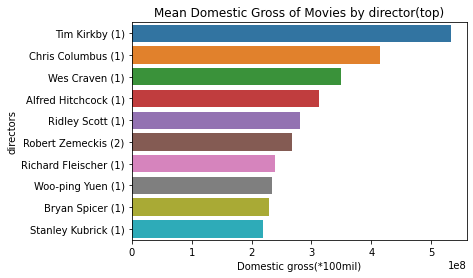

In [479]:
tdbdg = sb.barplot(top_directors_by_dgross["domestic_gross"], top_directors_by_dgross["directors"], orient = 'h')
tdbdg.set(xlabel = "Domestic gross(*100mil)", title="Mean Domestic Gross of Movies by director(top)")
tdbdg.set_yticklabels(top_directors_by_dgross["labels"])

### top directors by domestic gross/audience rating

In [474]:
#add new column to action that divides dgross by audience rating
action["dgross_and_rating"] = action["domestic_gross"]/ action["audience_rating"]

In [464]:
dgross_rating_director_df = groupby_unformatted_column(action, unique_directors, "directors", "dgross_and_rating")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [465]:
top_dgrd = dgross_rating_director_df[0:10]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Tim Kirkby (1)'),
 Text(0, 1, 'Chris Columbus (1)'),
 Text(0, 2, 'Bryan Spicer (1)'),
 Text(0, 3, 'Ridley Scott (1)'),
 Text(0, 4, 'Wes Craven (1)'),
 Text(0, 5, 'Dean Semler (1)'),
 Text(0, 6, 'John Herzfeld (1)'),
 Text(0, 7, 'Jeremiah S. Chechik (1)'),
 Text(0, 8, 'Mick Jackson (1)'),
 Text(0, 9, 'Alfred Hitchcock (1)')]

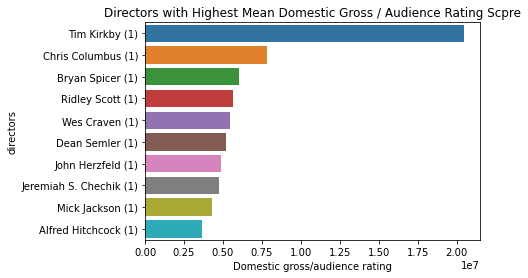

In [480]:
tdbdgar = sb.barplot(top_dgrd["dgross_and_rating"], top_dgrd["directors"], orient = 'h')
tdbdgar.set(xlabel = "Domestic gross/audience rating", title="Directors with Highest Mean Domestic Gross / Audience Rating Scpre")
tdbdgar.set_yticklabels(top_dgrd["labels"])

In [408]:
#turn string values within foreign gross column into na and drop them
not_list_format["foreign_gross"] = not_list_format["foreign_gross"].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

### Genre by domestic gross Revenue

In [495]:
genre_dgross_df = groupby_unformatted_column(not_list_format, unique_genres, "genres", "domestic_gross")

In [501]:
genre_dgross_df

,genres,domestic_gross,occurances,labels
16,Television,130680000.0,5,Television (5)
9,Classics,65118824.5,110,Classics (110)
8,Action & Adventure,54329305.5,201,Action & Adventure (201)
2,Romance,52853943.8,130,Romance (130)
1,Art House & International,49133283.7,98,Art House & International (98)
18,Comedy,49117594.8,330,Comedy (330)
11,Western,48709041.7,12,Western (12)
17,Science Fiction & Fantasy,45262482.2,129,Science Fiction & Fantasy (129)
6,Drama,43552453.3,568,Drama (568)
4,Musical & Performing Arts,42057595.5,44,Musical & Performing Arts (44)


In [502]:
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Cult Movies']
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Television']
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Classics']
genre_dgross_df = genre_dgross_df[genre_dgross_df["genres"] != 'Art House & International']

In [503]:
genre_dgross_df.sort_values("domestic_gross", ascending=False, inplace=True)

In [504]:
genre_dgross_df

,genres,domestic_gross,occurances,labels
8,Action & Adventure,54329305.5,201,Action & Adventure (201)
2,Romance,52853943.8,130,Romance (130)
18,Comedy,49117594.8,330,Comedy (330)
11,Western,48709041.7,12,Western (12)
17,Science Fiction & Fantasy,45262482.2,129,Science Fiction & Fantasy (129)
6,Drama,43552453.3,568,Drama (568)
4,Musical & Performing Arts,42057595.5,44,Musical & Performing Arts (44)
0,Mystery & Suspense,41504212.0,242,Mystery & Suspense (242)
14,Sports & Fitness,41320188.9,9,Sports & Fitness (9)
5,Horror,38943323.5,115,Horror (115)


<ipython-input-506-30f381d6dd5d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(genre_dgross_df["labels"])


Text(0, 0.5, 'Genre')

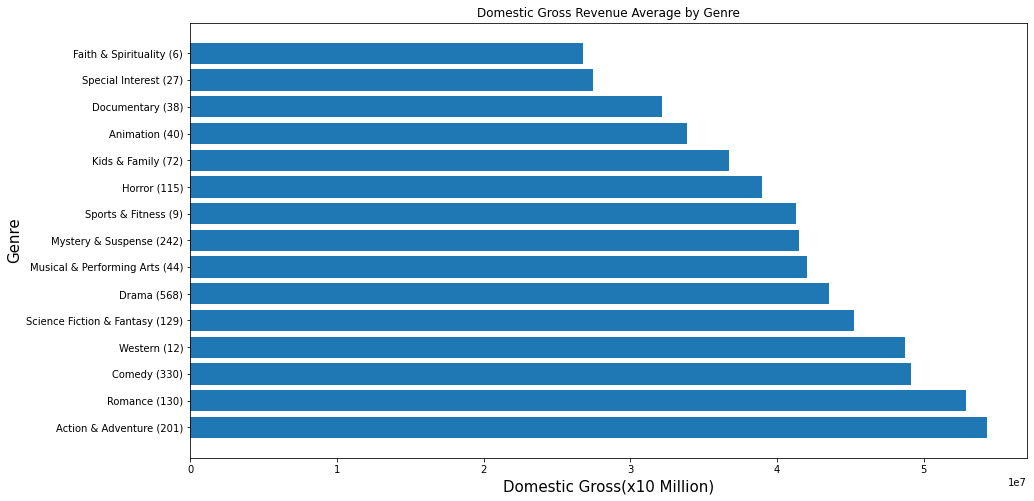

In [506]:
#make graph of mean gross by genre
fig, ax = plt.subplots(figsize= (15, 8))
ax.barh(genre_dgross_df["genres"], genre_dgross_df["domestic_gross"])
ax.set_title("Domestic Gross Revenue Average by Genre")
ax.set_yticklabels(genre_dgross_df["labels"])
ax.set_xlabel("Domestic Gross(x10 Million)",fontsize=15)
ax.set_ylabel("Genre",fontsize=15)

### Genre by audience rating

In [508]:
genre_rating_df = groupby_unformatted_column(not_list_format, unique_genres, "genres", "audience_rating")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Classics (110)'),
 Text(0, 1, 'Sports & Fitness (9)'),
 Text(0, 2, 'Art House & International (98)'),
 Text(0, 3, 'Documentary (38)'),
 Text(0, 4, 'Special Interest (27)'),
 Text(0, 5, 'Cult Movies (5)'),
 Text(0, 6, 'Musical & Performing Arts (44)'),
 Text(0, 7, 'Faith & Spirituality (6)'),
 Text(0, 8, 'Romance (130)'),
 Text(0, 9, 'Western (12)'),
 Text(0, 10, 'Drama (568)'),
 Text(0, 11, 'Television (5)'),
 Text(0, 12, 'Animation (40)'),
 Text(0, 13, 'Comedy (330)'),
 Text(0, 14, 'Kids & Family (72)'),
 Text(0, 15, 'Action & Adventure (201)'),
 Text(0, 16, 'Mystery & Suspense (242)'),
 Text(0, 17, 'Science Fiction & Fantasy (129)'),
 Text(0, 18, 'Horror (115)')]

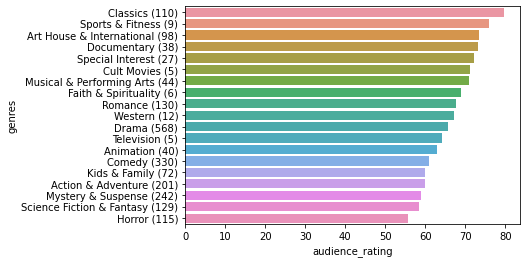

In [510]:
gbar = sb.barplot(genre_rating_df["audience_rating"], genre_rating_df["genres"], orient="h")
gbar.set_yticklabels(genre_rating_df["labels"])